# Qubit
Estado en superposición, en contraste con el bit clásico.

Para emplear la comutación cuántica se usa qiskit en Python.

In [49]:
from qiskit.visualization import array_to_latex
from qiskit.quantum_info import Statevector
import numpy as np

## Ket

Vectores columna:

In [50]:
ket0 = [[1],[0]]
array_to_latex(ket0)

<IPython.core.display.Latex object>

In [51]:
ket1 = [[0],[1]]
array_to_latex(ket1)

<IPython.core.display.Latex object>

Se usa array_to_latex() SOLO para escribir y visualizar los qubits.

In [52]:
ket_plus  = [[1/np.sqrt(2)],[1/np.sqrt(2)]]
array_to_latex(ket_plus)

<IPython.core.display.Latex object>

Se usa Statevector para convertirlo en un objeto que se puede manipular en Python:

In [53]:
ket_0 = Statevector(ket0)
ket_0

Statevector([1.+0.j, 0.+0.j],
            dims=(2,))


In [54]:
ket_0.draw('latex')

<IPython.core.display.Latex object>

In [55]:
ket_1 = Statevector(ket1)
ket_1.draw('latex')

<IPython.core.display.Latex object>

In [56]:
ket_plus = Statevector(ket_plus)
ket_plus.draw('latex')

<IPython.core.display.Latex object>

Se puede verificar la normalziación de un vector con el método is_valid()

In [57]:
ket_plus.is_valid()

True

Se puede ver la probabilidad de cada base con probabilities()

In [58]:
print(ket_0.probabilities())

[1. 0.]


In [59]:
print(ket_plus.probabilities())

[0.5 0.5]


Para emplear bases conocidas, usamos Statevector.from_label()

In [60]:
ket_plus = Statevector.from_label('+')
ket_plus.draw('latex')

<IPython.core.display.Latex object>

In [61]:
ket_minus = Statevector.from_label('-')
ket_minus.draw('latex')

<IPython.core.display.Latex object>

In [62]:
ket_r = Statevector.from_label('r')
ket_r.draw('latex')

<IPython.core.display.Latex object>

## Bra
Se representan por vectores fila y son los transpuestos conjugados de los kets

In [63]:
bra0 = [1, 0]
array_to_latex(bra0)

<IPython.core.display.Latex object>

In [64]:
bra1 = [0, 1]
array_to_latex(bra1)

<IPython.core.display.Latex object>

# Producto interno

In [65]:
from qiskit.quantum_info.operators import Operator

Se usa Operator() para crear un operador que permita multiplicar por ese vector

In [66]:
Operator_ket0 = Operator(ket0)
Operator_ket0

Operator([[1.+0.j],
          [0.+0.j]],
         input_dims=(), output_dims=(2,))

In [67]:
array_to_latex(Operator_ket0)

<IPython.core.display.Latex object>

In [68]:
Operator_bra1 = Operator(bra1)
Operator_bra1

Operator([0.+0.j, 1.+0.j],
         input_dims=(), output_dims=(2,))

In [69]:
array_to_latex(Operator_bra1)

<IPython.core.display.Latex object>

El producto interno sigue el orden bra-ket\
Esto es:
$$\braket{1|0}$$
y para multiplicarlos en qiskit, se debe respetar ese orden.

In [70]:
Dot_10 = np.dot(Operator_bra1, Operator_ket0)
Dot_10

array([0.+0.j])

In [71]:
array_to_latex(Dot_10)

<IPython.core.display.Latex object>

Añadiendo los operadores de las bases faltantes

In [72]:
Operator_ket1 = Operator(ket1)
Operator_bra0 = Operator(bra0)

In [73]:
array_to_latex(Operator_ket1)

<IPython.core.display.Latex object>

# Producto externo
Se usan los mismos operadores creados previamente

In [74]:
Producto_externo_00 = np.outer(Operator_ket0, Operator_bra0)
Producto_externo_00

array([[1.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j]])

In [75]:
array_to_latex(Producto_externo_00)

<IPython.core.display.Latex object>

## Matriz unitaria

In [76]:
Operator_ket1 = Operator(ket1)
Operator_bra0 = Operator(bra0)

In [77]:
Producto_externo_00 = np.outer(Operator_bra0, Operator_ket0)
Producto_externo_11 = np.outer(Operator_bra1, Operator_ket1)

In [78]:
identity = Producto_externo_00 + Producto_externo_11
array_to_latex(identity)

<IPython.core.display.Latex object>

# Esfera de Bloch
Es una representación 3D del estado cuántico de un qubit

In [79]:
from qiskit.visualization import plot_bloch_vector

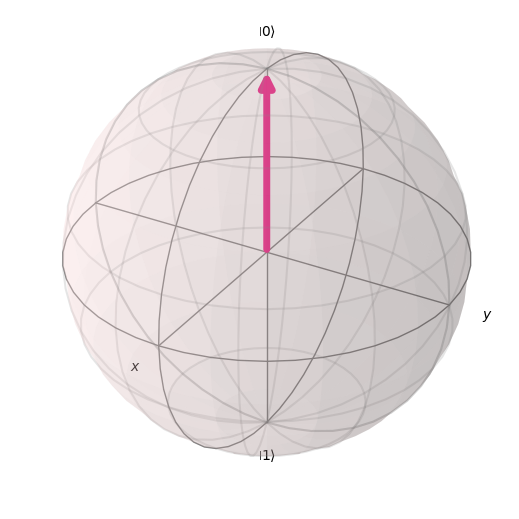

In [80]:
plot_bloch_vector([0,0,1]) #Estado |0> en coordenadas (x,y,z)

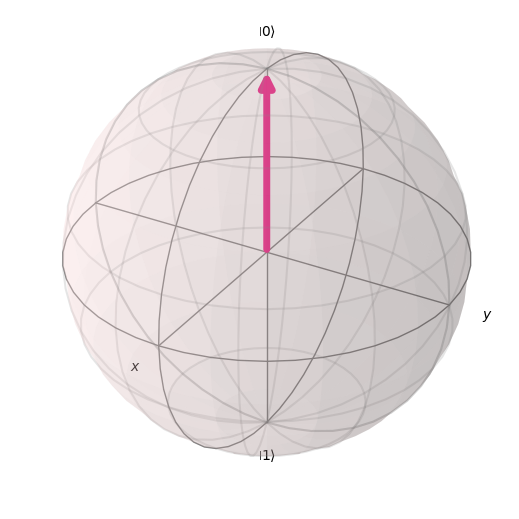

In [81]:
plot_bloch_vector([1,0,0], coord_type='spherical') #Estado |0> en esféricas (r,theta,phi)

Para un estado arbitrario usamos plot_bloch_multivector

In [82]:
from qiskit.visualization import plot_bloch_multivector

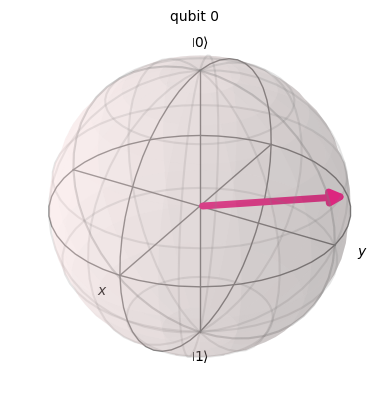

In [83]:
ket = Statevector([[(1+2j)/3],[-2/3]])
plot_bloch_multivector(ket)

# Qubits entrelazados

In [84]:
qubit = Statevector([np.sqrt(2),1,0,1j])
qubit.draw('latex')

<IPython.core.display.Latex object>

In [85]:
q1 = Statevector([1/np.sqrt(2), -1/np.sqrt(2)])
q2 = Statevector([1/np.sqrt(2), -1j/np.sqrt(2)])
q2.draw('latex')

<IPython.core.display.Latex object>

In [86]:
q = q1.tensor(q2)
q.draw('latex')

<IPython.core.display.Latex object>

In [87]:
q = q2.tensor(q1)
q.draw('latex')

<IPython.core.display.Latex object>

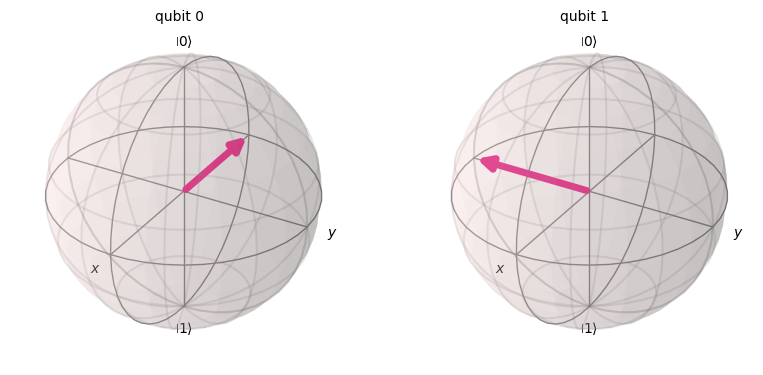

In [88]:
plot_bloch_multivector(q)

In [89]:
q.is_valid()

True

La probabilidad de las bases entrelazadas se puede calcular con el método .probalitie() o con el método .probabilities_dict()

In [90]:
prob_q = q.probabilities()
prob_q

array([0.25, 0.25, 0.25, 0.25])

In [91]:
prob_for_qubit = q.probabilities_dict()
prob_for_qubit

{'00': 0.2499999999999999,
 '01': 0.2499999999999999,
 '10': 0.2499999999999999,
 '11': 0.2499999999999999}

La probabilidad por cada qubit se calcula con el método .probabilities_dict([i]) donde $i$ es el qubit i-ésimo contando de derecha hasta izquierda empezando en $i=0$

In [92]:
prob_for_qubit2 = q.probabilities_dict([0])
prob_for_qubit2

{'0': 0.4999999999999998, '1': 0.4999999999999998}

# Operadores unitarios

In [93]:
from qiskit.quantum_info.operators import Operator, Pauli
from qiskit.visualization import array_to_latex

In [94]:
Operator_1 = Operator([[1,1],[1,0]])
Operator_1

Operator([[1.+0.j, 1.+0.j],
          [1.+0.j, 0.+0.j]],
         input_dims=(2,), output_dims=(2,))

In [95]:
array_to_latex(Operator_1)

<IPython.core.display.Latex object>

## Matrices de Pauli

In [101]:
pauli_x = Pauli('X')
array_to_latex(pauli_x)

<IPython.core.display.Latex object>

In [102]:
pauli_y = Pauli('Y')
array_to_latex(pauli_y)

<IPython.core.display.Latex object>

In [103]:
pauli_z = Pauli('Z')
array_to_latex(pauli_z)

<IPython.core.display.Latex object>

# Compuertas cuánticas

Análogas a sus compuertas lógicas, pero estas tienen el mismo número de entradas y de salidas por lo que son reversibles

# Tipos de compuertas

## Compuertas unarias
Tiene un qubit de entrada y uno de salida y representan giros sobre la esfera de Bloch

### Compuerta X o compuerta NOT
Esta compuerta cambia la base computacional
$$X\ket{0}=\ket{1}$$
$$X\ket{1}=\ket{0}$$
Sobre un qubit general, $NOT$ invierte las bases.

In [104]:
from qiskit import QuantumCircuit

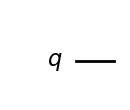

In [125]:
primer_circuito = QuantumCircuit(1)
primer_circuito.draw('mpl')

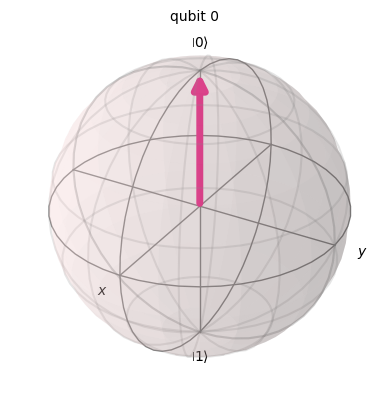

In [126]:
plot_bloch_multivector(primer_circuito)

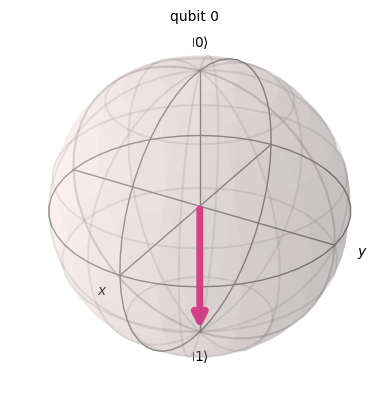

In [128]:
primer_circuito.x(0)
plot_bloch_multivector(primer_circuito)

OBSERVACIÓN: Para qiskit, el orden de los qubits es de derecha a izquierda, empezando por el 0

### Compuerta Y

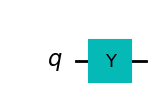

In [131]:
segundo_circuito = QuantumCircuit(1)
segundo_circuito.y(0)
segundo_circuito.draw('mpl')

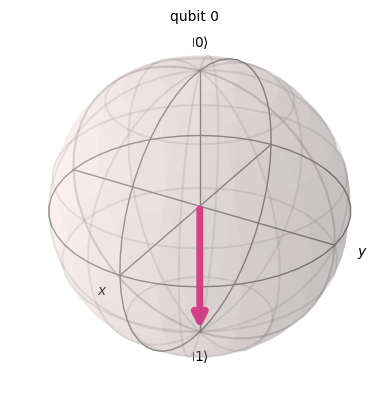

In [130]:
plot_bloch_multivector(segundo_circuito)

### Compuerta Z

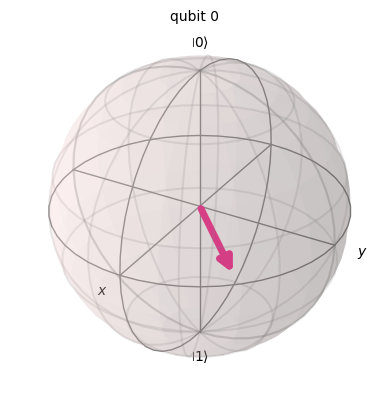

In [148]:
from qiskit.quantum_info import random_statevector
tercer_circuito = QuantumCircuit(1)
tercer_circuito.initialize(random_statevector(2).data,0)
plot_bloch_multivector(tercer_circuito)

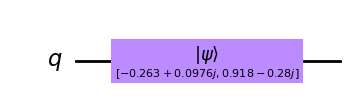

In [149]:
tercer_circuito.draw('mpl')

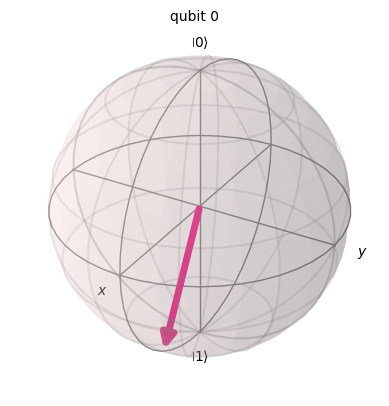

In [150]:
tercer_circuito.z(0)
plot_bloch_multivector(tercer_circuito)

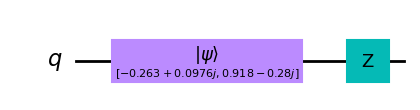

In [151]:
tercer_circuito.draw('mpl')

### Compuerta Hadamard
Superpone las bases formando los estados $+$ y $-$ a partir de las entradas $\ket{0}$ y $\ket{1}$, respectivamente
$$\hat{H}\ket{0}=\ket{+}$$
$$\hat{H}\ket{1}=\ket{-}$$

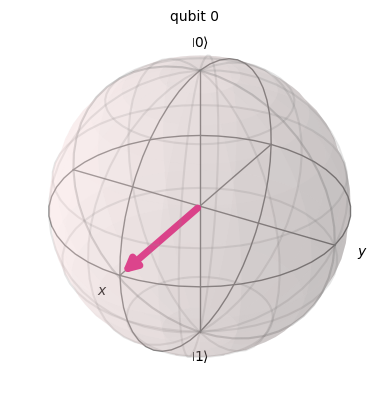

In [152]:
cuarto_circuito = QuantumCircuit(1)
cuarto_circuito.h(0)
plot_bloch_multivector(cuarto_circuito)

### Compuerta de fase R
$$R_\phi \ket{0} = \ket{0}$$
$$R_\phi \ket{1} = e^{i\phi}\ket{1}$$

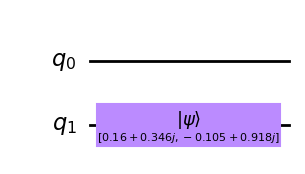

In [183]:
quinto_circuito = QuantumCircuit(2)
quinto_circuito.initialize(random_statevector(2).data, 1)
quinto_circuito.draw('mpl')

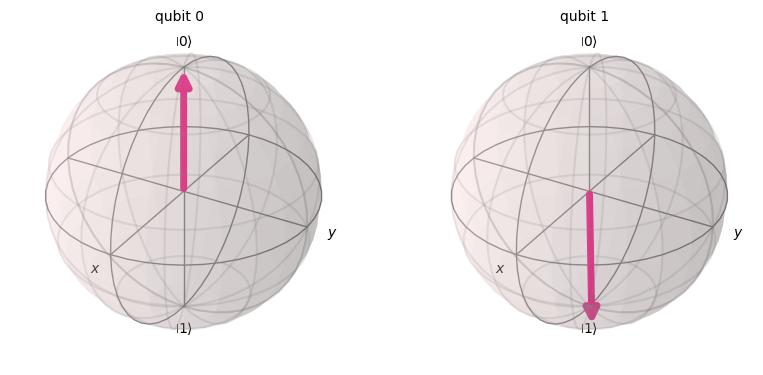

In [184]:
plot_bloch_multivector(quinto_circuito)

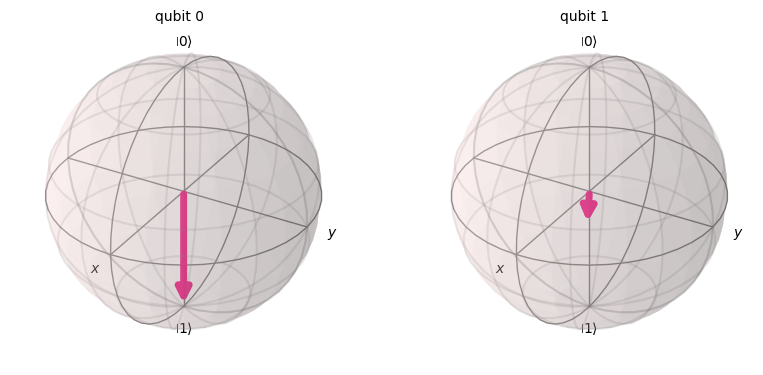

In [185]:
quinto_circuito.p(np.pi,1)
quinto_circuito.x(0)
quinto_circuito.z(0)
plot_bloch_multivector(quinto_circuito)

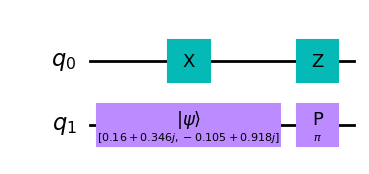

In [186]:
quinto_circuito.draw('mpl')

### Compuerta S
$$S = R_{\pi/2}$$

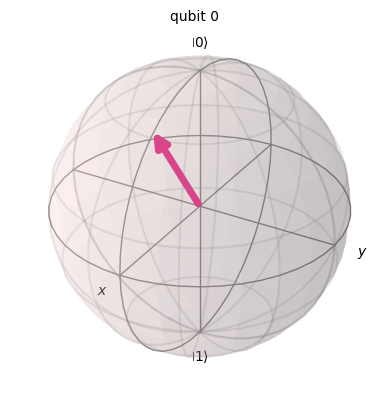

In [192]:
sexto_circuito = QuantumCircuit(1)
sexto_circuito.initialize(random_statevector(2).data, 0)
plot_bloch_multivector(sexto_circuito)

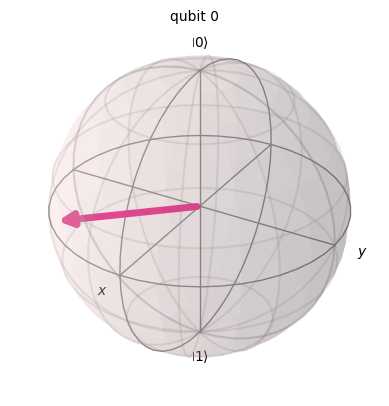

In [193]:
sexto_circuito.p(np.pi/2, 0)
plot_bloch_multivector(sexto_circuito)

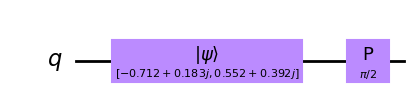

In [194]:
sexto_circuito.draw('mpl')

### Compuerta T
$$S = R_{\pi/4}$$

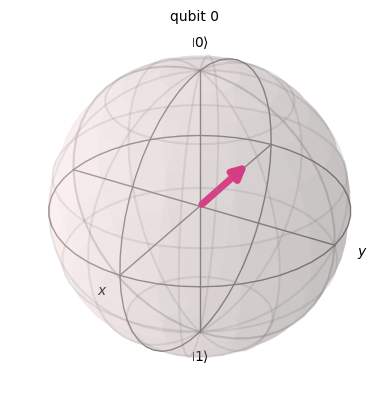

In [205]:
septimo_circuito = QuantumCircuit(1)
septimo_circuito.initialize(random_statevector(2).data, 0)
plot_bloch_multivector(septimo_circuito)

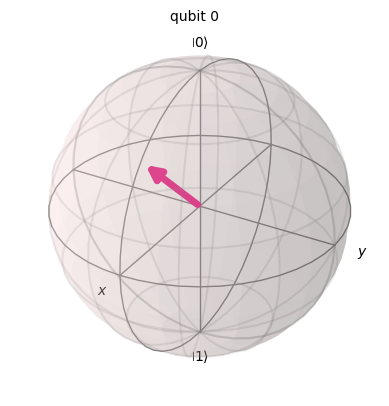

In [207]:
septimo_circuito.p(np.pi/4, 0)
plot_bloch_multivector(septimo_circuito)

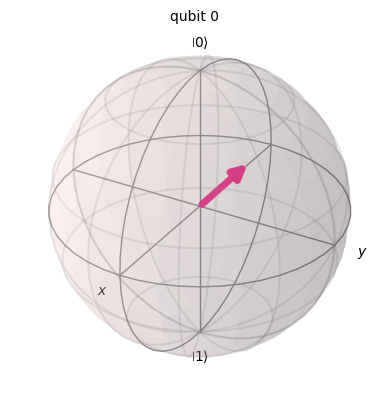

In [208]:
septimo_circuito.p(-np.pi/4, 0)
plot_bloch_multivector(septimo_circuito)

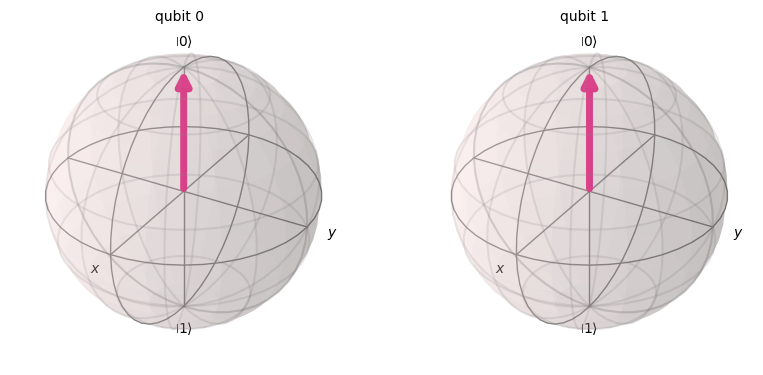

In [213]:
octavo_circuito = QuantumCircuit(2)
octavo_circuito.s(0)
octavo_circuito.t(1)
plot_bloch_multivector(octavo_circuito)

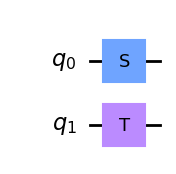

In [214]:
octavo_circuito.draw('mpl')

### Compuerta $U_3$
Permite una rotación general sobre la esfera de Bloch usando los ángulos de Euler

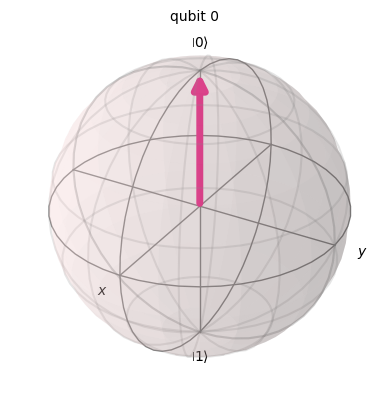

In [218]:
noveno_circuito = QuantumCircuit(1)
plot_bloch_multivector(noveno_circuito)

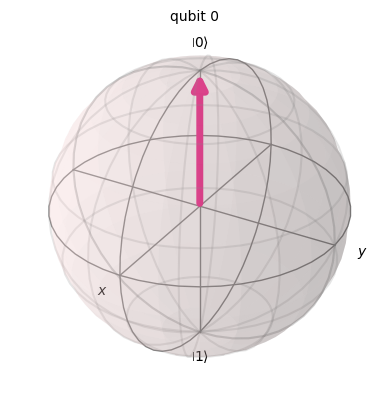

In [220]:
noveno_circuito.u(np.pi,np.pi,np.pi/2, 0)
plot_bloch_multivector(noveno_circuito)

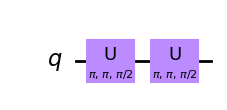

In [229]:
noveno_circuito.draw('mpl')

In [230]:
Statevector(noveno_circuito).draw('Latex')

<IPython.core.display.Latex object>

## Compuertas para dos qubits
### Compuerta CNOT

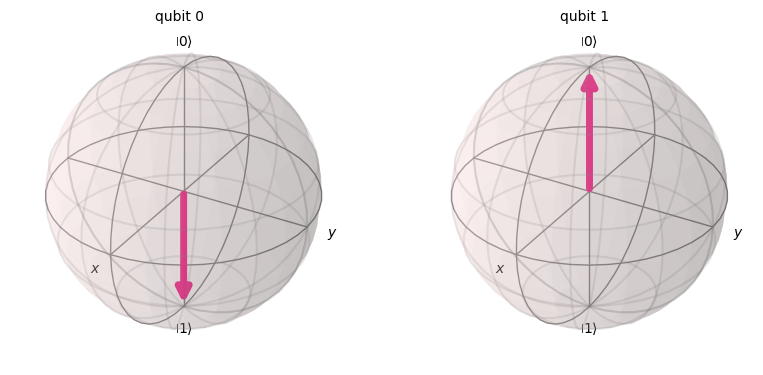

In [246]:
decimo_circuito = QuantumCircuit(2)
decimo_circuito.x(0)
plot_bloch_multivector(decimo_circuito)

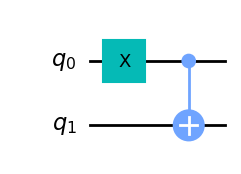

In [247]:
decimo_circuito.cnot(0,1)
decimo_circuito.draw('mpl')

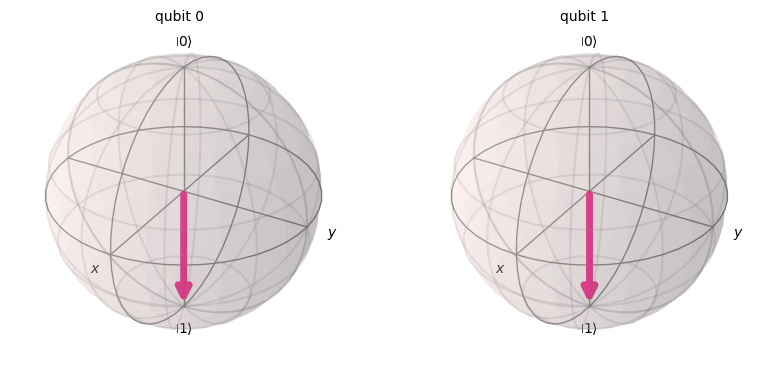

In [248]:
plot_bloch_multivector(decimo_circuito)

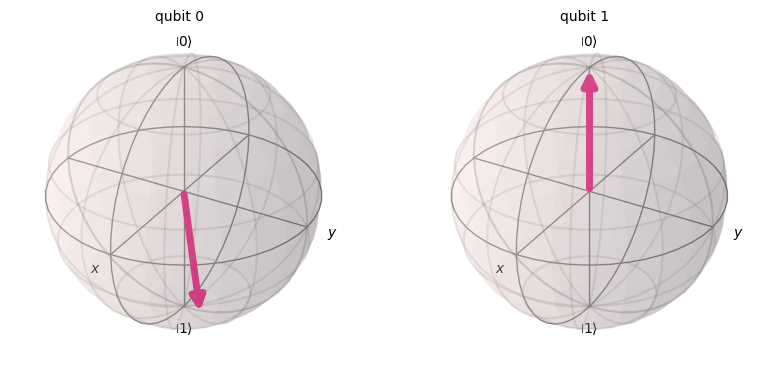

In [254]:
circuito11 = QuantumCircuit(2)
circuito11.initialize(random_statevector(2).data,0)
plot_bloch_multivector(circuito11)

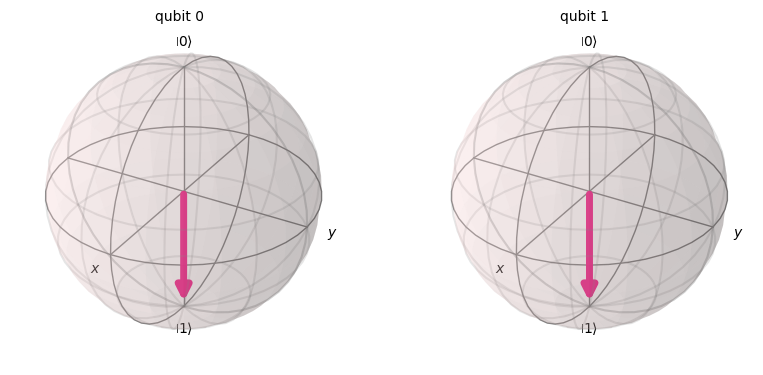

In [255]:
circuito11.cnot(0,1)
plot_bloch_multivector(circuito11)

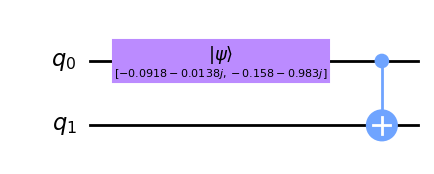

In [257]:
circuito11.draw('mpl')

# Graficar varios qubits en una sola esfera de Bloch

In [258]:
from qiskit.visualization import plot_state_qsphere

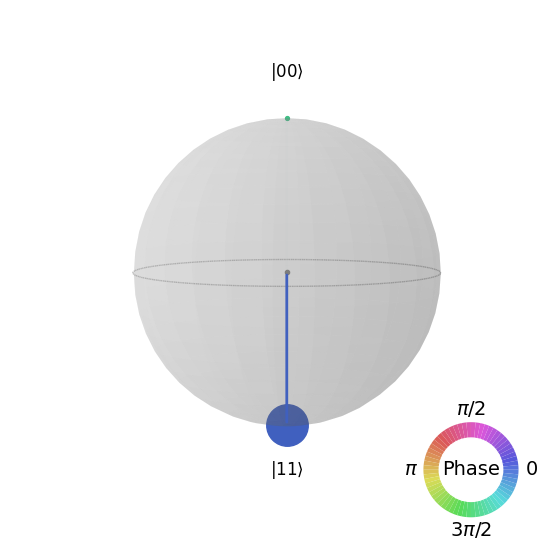

In [259]:
plot_state_qsphere(circuito11)

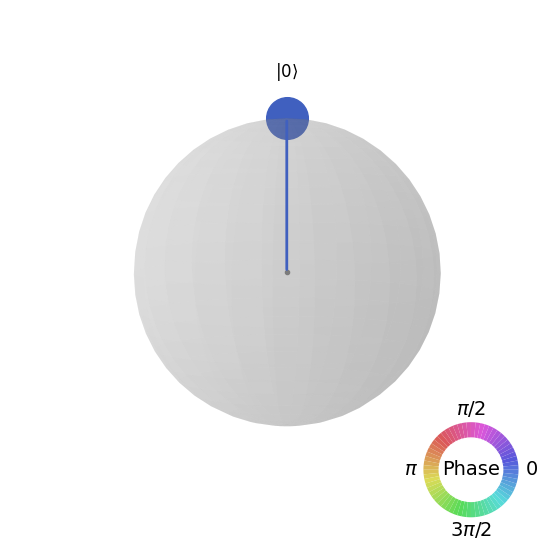

In [260]:
plot_state_qsphere(noveno_circuito)

# Compuertas cuánticas para 3 qubits

## Compuerta de Fredkin
Es una compuerta $SWAP$ tipo control, o sea, $CSWAP$

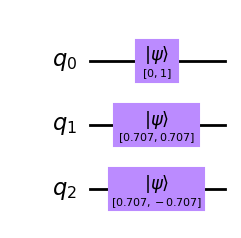

In [264]:
circuito12 = QuantumCircuit(3)
circuito12.initialize(Statevector.from_label('1'), 0)
circuito12.initialize(Statevector.from_label('+'), 1)
circuito12.initialize(Statevector.from_label('-'), 2)
circuito12.draw('mpl')

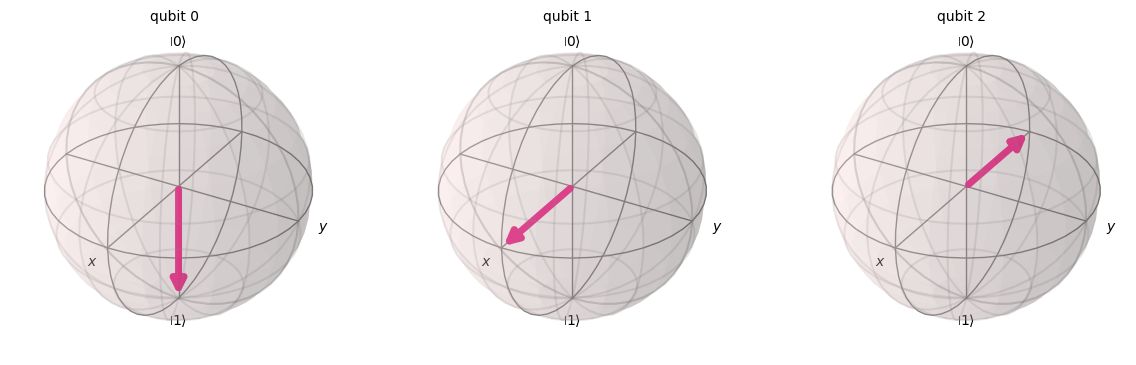

In [265]:
plot_bloch_multivector(circuito12)

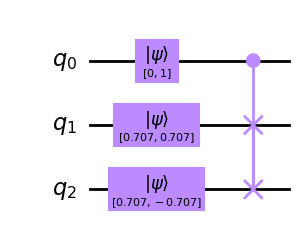

In [262]:
circuito12.fredkin(0,1,2)
circuito12.draw('mpl')

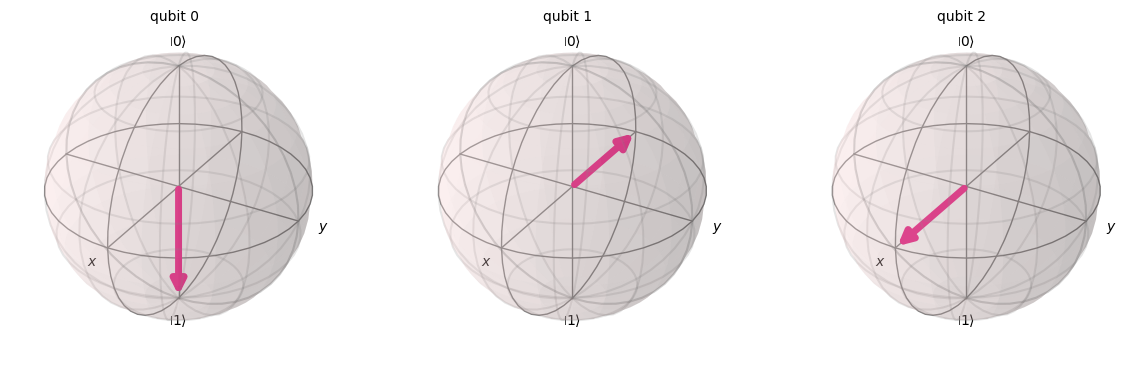

In [263]:
plot_bloch_multivector(circuito12)

## Compuerta Toffoli
Tiene dos qubits control y un NOT: $CCNOT$

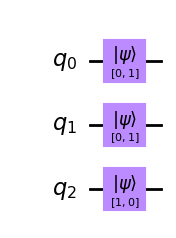

In [269]:
circuito13 = QuantumCircuit(3)
circuito13.initialize(Statevector.from_label('1'), 0)
circuito13.initialize(Statevector.from_label('1'), 1)
circuito13.initialize(Statevector.from_label('0'), 2)
circuito13.draw('mpl')

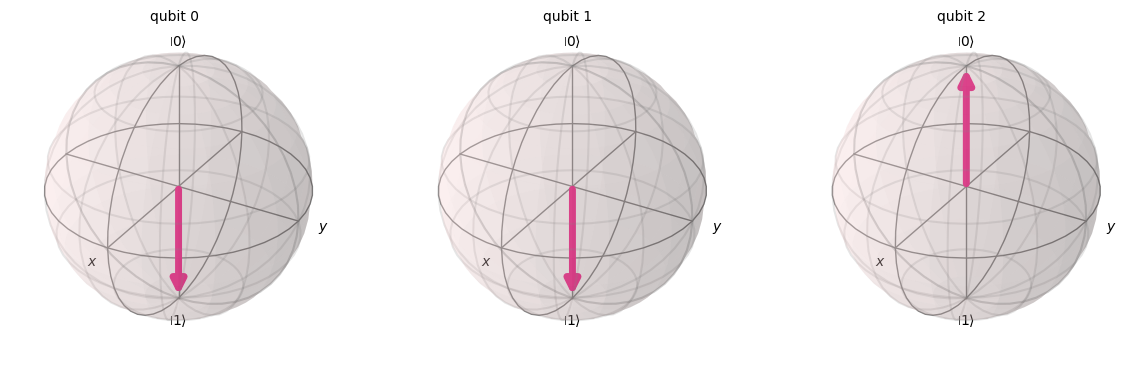

In [270]:
plot_bloch_multivector(circuito13)

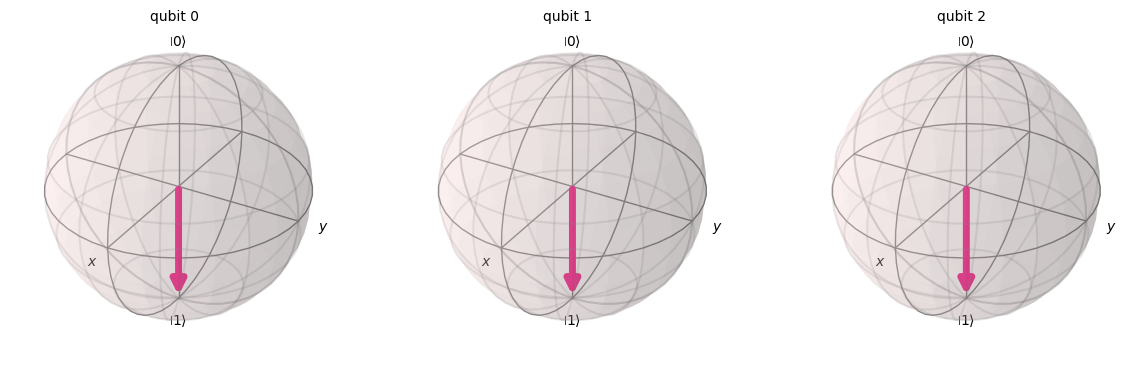

In [271]:
circuito13.toffoli(0,1,2)
plot_bloch_multivector(circuito13)